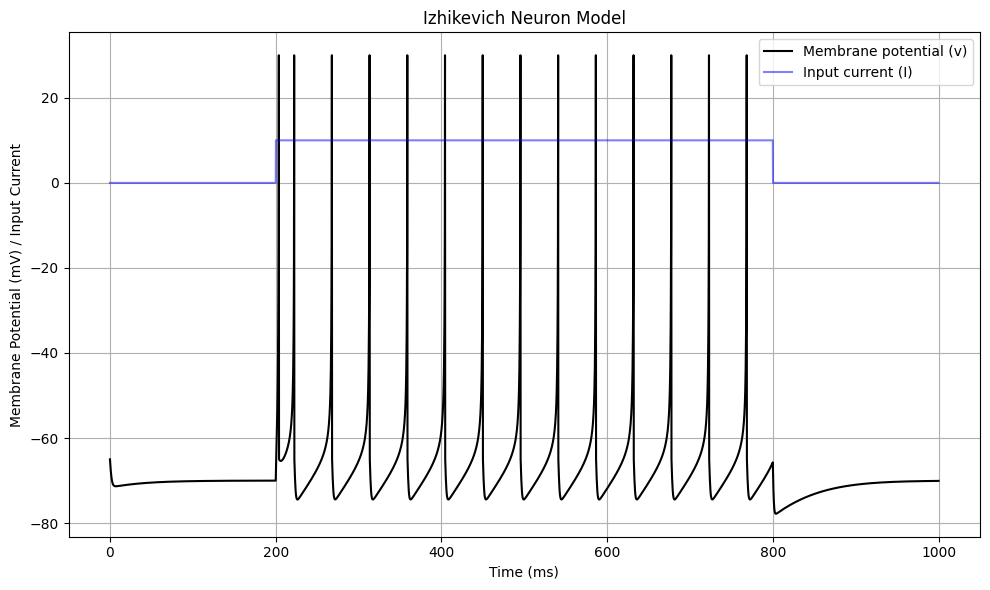

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Time condition
Time = 1000     # total time in ms
dtime = 0.25    # time step in ms
time = np.arange(0, Time, dtime)

#Izhikevich parameters 
a = 0.02
b = 0.2
c = -65
d = 8
v = np.full(len(time), -65.0)   # membrane potential array
u = b * v[0]                    # initial recovery variable
u_vals = np.zeros(len(time))   # recovery variable for plotting
Inputcurrent = np.zeros(len(time))  # input current

# input current between 200ms and 800ms
Inputcurrent[(time > 200) & (time < 800)] = 10

#main condition
for i in range(1, len(time)):
    dv = (0.04 * v[i-1]**2 + 5 * v[i-1] + 140 - u + Inputcurrent[i]) * dtime
    du = a * (b * v[i-1] - u) * dtime
    v[i] = v[i-1] + dv
    u += du
    u_vals[i] = u

    # Spike condition
    if v[i] >= 30:
        v[i-1] = 30  # for sharp spike visual
        v[i] = c
        u += d

# Plotting 
plt.figure(figsize=(10, 6))
plt.plot(time, v, label='Membrane potential (v)', color='black')
plt.plot(time, Inputcurrent, label='Input current (I)', color='blue', alpha=0.5)
plt.title('Izhikevich Neuron Model')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV) / Input Current')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


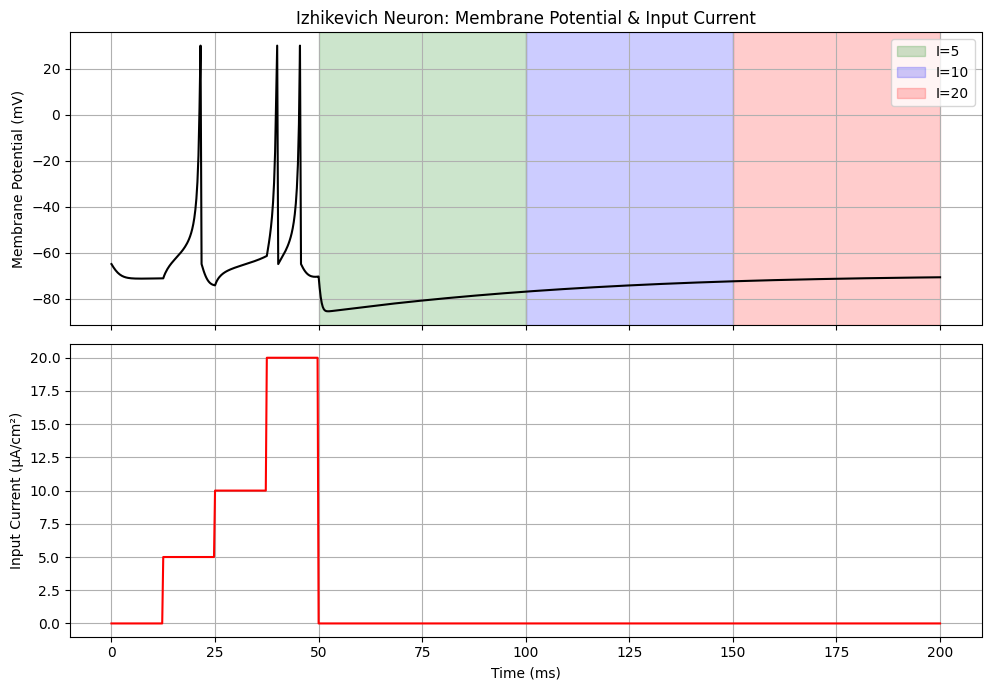

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation 

T = 200       # total simulation time in ms
dt = 0.25        # time step
time = np.arange(0,T+dt,
                 dt)

# Izhikevich neuron variables
a = 0.02
b = 0.2
c = -65
d = 8

# Initialize state variables
v = -65 * np.ones(len(time))  # Membrane potential (mV)
u = b * v                     # Recovery variable
I = np.zeros(len(time))       # Input current

# Define input current in different time windows
I[50:100] = 5     # Weak input

I[100:150] = 10   # Medium input

I[150:200] = 20   # Strong input

# Simulate the neuron
for t in range(1, len(time)):
    if v[t - 1] >= 30:
        v[t - 1] = 30  # Cap spike
        v[t] = c       # Reset membrane potential
        u[t] = u[t - 1] + d
    else:
        dv = (0.04 * v[t - 1] ** 2 + 5 * v[t - 1] + 140 - u[t - 1] + I[t - 1]) * dt
        du = (a * (b * v[t - 1] - u[t - 1])) * dt
        v[t] = v[t - 1] + dv
        u[t] = u[t - 1] + du

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 7), sharex=True)

# Membrane potential plot
axs[0].plot(time, v, color='black')

axs[0].set_ylabel('Membrane Potential (mV)')

axs[0].set_title('Izhikevich Neuron: Membrane Potential & Input Current')

axs[0].grid(True)

# Highlight current phases
axs[0].axvspan(50, 100, color='green', alpha=0.2, label='I=5')

axs[0].axvspan(100, 150, color='blue', alpha=0.2, label='I=10')

axs[0].axvspan(150, 200, color='red', alpha=0.2, label='I=20')

axs[0].legend(loc='upper right')

# Input current plot
axs[1].plot(time, I, color='red')

axs[1].set_ylabel('Input Current (µA/cm²)')

axs[1].set_xlabel('Time (ms)')

axs[1].grid(True)

plt.tight_layout()
plt.show()


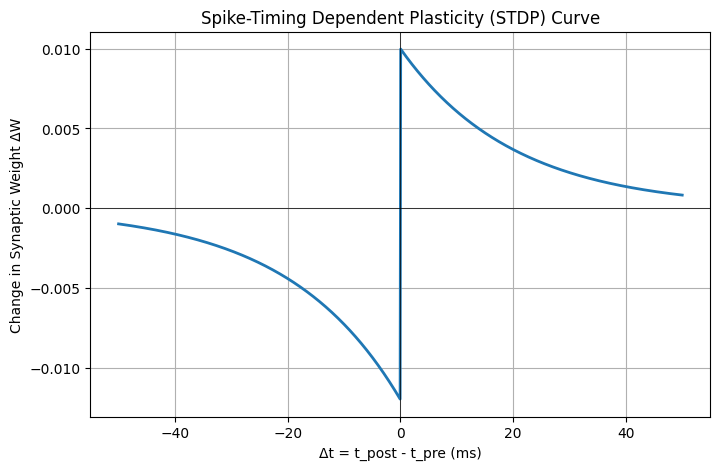

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Time range (calculated in ms)
delta_t = np.linspace(-50, 50, 1000)

# Spike time dependent plasticity variables
A_plus = 0.01    # Potentiation amplitude
A_minus = -0.012 # Depression amplitude
tau_plus = 20.0  # Time constant for LTP
tau_minus = 20.0 # Time constant for LTD

# STDP function
def stdp_curve(dt):
    if dt >= 0:
        return A_plus * np.exp(-dt / tau_plus)
    else:
        return A_minus * np.exp(dt / tau_minus)

# Vectorize for plotting
stdp_vec = np.vectorize(stdp_curve)
delta_w = stdp_vec(delta_t)

# Plot
plt.figure(figsize=(8,5))
plt.plot(delta_t, delta_w, lw=2)
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.title('Spike-Timing Dependent Plasticity (STDP) Curve')
plt.xlabel('Δt = t_post - t_pre (ms)')
plt.ylabel('Change in Synaptic Weight ΔW')
plt.grid(True)
plt.show()


WARNING    'I' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value array([0., 0., 0., ..., 0., 0., 0.], shape=(801,)). The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'i' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value 3999. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'i' is an internal variable of group 'synapses', but also exists in the run namespace with the value 3999. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    Removing unsupported flag '-march=native' from compiler flags. [brian2.codegen.cpp_prefs]
WARNING    'a' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value 0.02. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARN

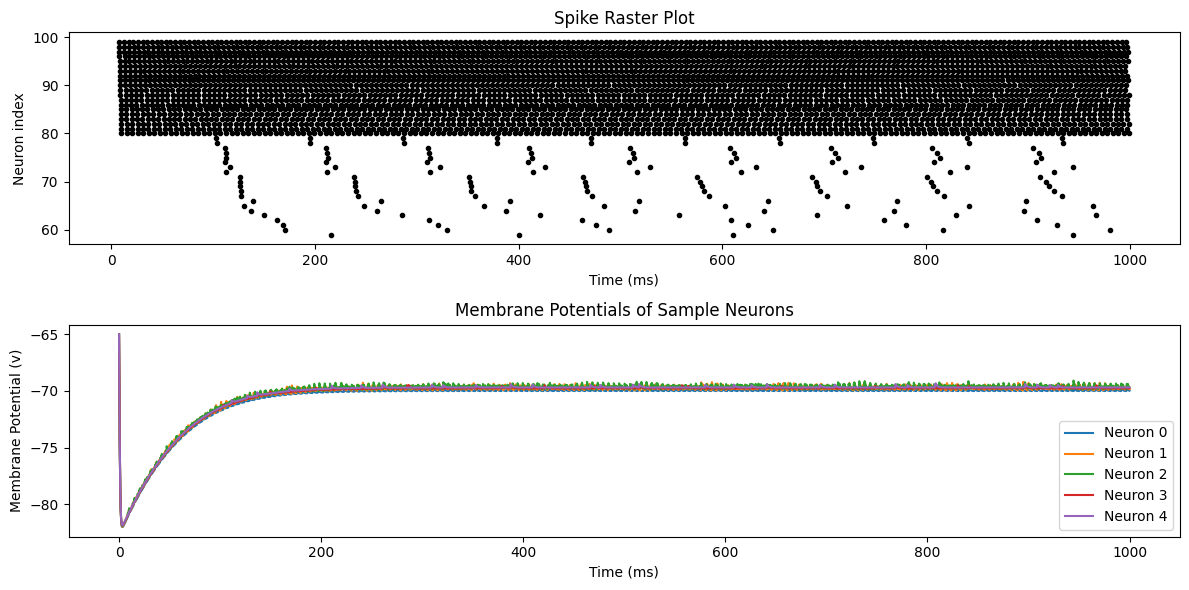

In [4]:
from brian2 import *

# Simulation parameters

start_scope()
duration = 1 * second

# Neuron model (Izhikevich-like simplification,Brian2 used)
eqs = '''
dv/dt = (0.04*v**2 + 5*v + 140 - u + I)/ms : 1
du/dt = a*(b*v - u)/ms : 1
I : 1
a : 1
b : 1
c : 1
d : 1
'''

# Network size
N = 100
Ne = int(0.8 * N)  # 80 percent of neurons excitatory
Ni = N - Ne        # 20 percent of neurons inhibitory

# grouping

G = NeuronGroup(N, eqs, threshold='v >= 30', reset='v = c; u += d', method='euler')
G.v = -65
G.u = G.b * G.v
G.I = 0

# Assign parameters (regular spiking for excitatory, fast spiking for inhibitory)
G.a[:Ne] = 0.02
G.b[:Ne] = 0.2
G.c[:Ne] = -65
G.d[:Ne] = 8

G.a[Ne:] = 0.1
G.b[Ne:] = 0.2
G.c[Ne:] = -65
G.d[Ne:] = 2

# External input
G.I[:Ne] = '5 * i / Ne'      # Gradual input to excitatory
G.I[Ne:] = '2 * i / Ni + 5'  # Less input to inhibitory

# Synapses with STDP (plasticity)
S = Synapses(G, G,
    '''
    w : 1
    dApre/dt = -Apre / tau_pre : 1 (event-driven)
    dApost/dt = -Apost / tau_post : 1 (event-driven)
    ''',
    on_pre='''
    v_post += w
    Apre += dApre_val
    w = clip(w + Apost, 0, wmax)
    ''',
    on_post='''
    Apost += dApost_val
    w = clip(w + Apre, 0, wmax)
    '''
)

S.connect(condition='i != j', p=0.1)  # Randomly connect 10% of all pairs

#variables used in synapses

S.w = '0.2 + 0.1 * rand()'  # random initial weight
tau_pre = 20*ms
tau_post = 20*ms
dApre_val = 0.01
dApost_val = -0.012
wmax = 1.0

# Monitors
spikemon = SpikeMonitor(G)
statemon = StateMonitor(G, 'v', record=range(5))  # first 5 neurons

# Running the simulation
run(duration)

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Raster plots

plt.subplot(2, 1, 1)
plt.plot(spikemon.t/ms, spikemon.i, '.k')
plt.xlabel('Time (ms)')
plt.ylabel('Neuron index')
plt.title('Spike Raster Plot')

# Membrane potentials

plt.subplot(2, 1, 2)
for i in range(5):
    plt.plot(statemon.t/ms, statemon.v[i], label=f'Neuron {i}')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (v)')
plt.title('Membrane Potentials of Sample Neurons')
plt.legend()

plt.tight_layout()
plt.show()


WARNING    'i' is an internal variable of group 'synapses_1', but also exists in the run namespace with the value 4. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'I' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value array([0., 0., 0., ..., 0., 0., 0.], shape=(801,)). The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'i' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value 4. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    't' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value 800. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'a' is an internal variable of group 'neurongroup_1', but also exists in the run namespace wi

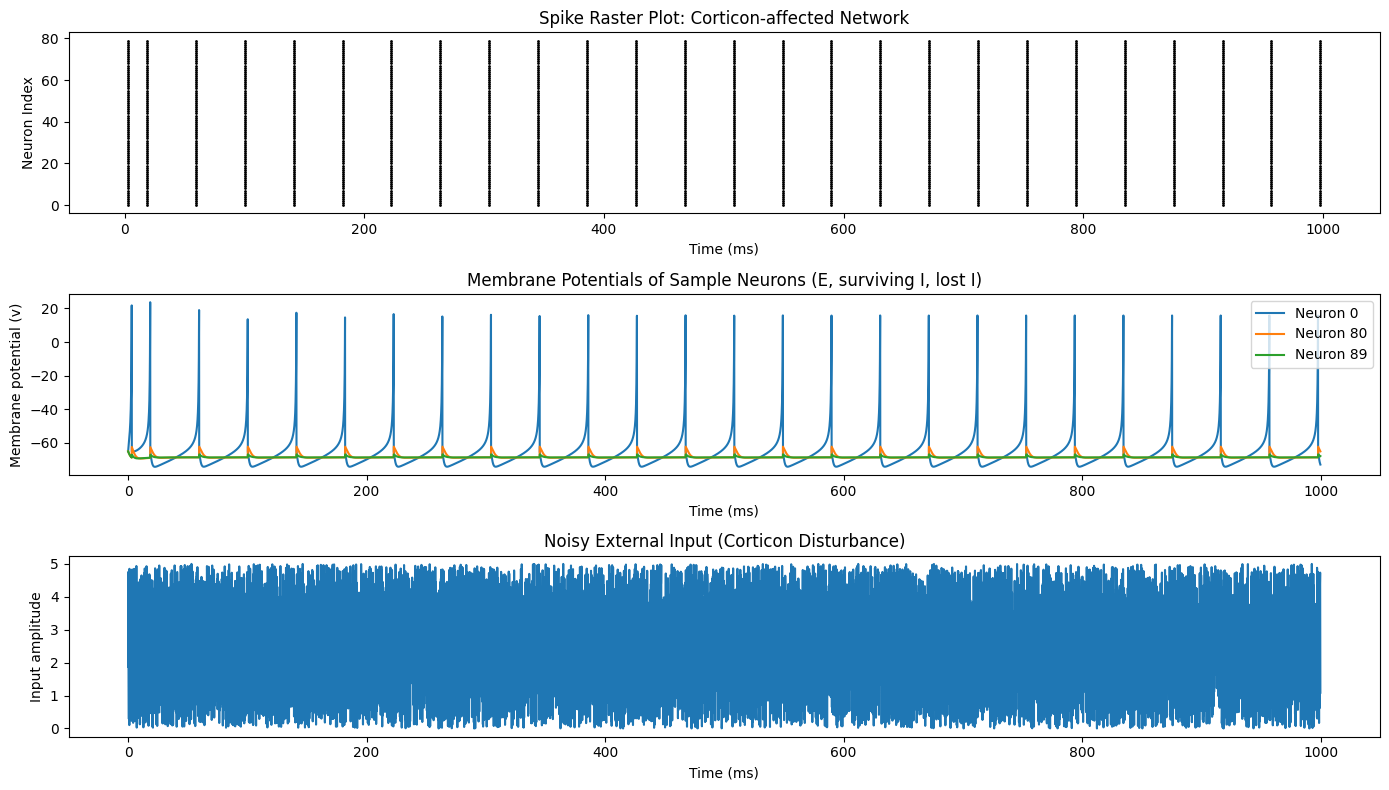

In [5]:
from brian2 import *
import numpy as np
import matplotlib.pyplot as plt

start_scope()

duration = 1 * second  # total simulation time
N = 100                # total number of neurons
frac_exc = 0.8         # fraction of excitatory neurons
Ne = int(N * frac_exc) # number of excitatory neurons
Ni = N - Ne            # number of inhibitory neurons

# Neuron Model (Izhikevich)

# dv/dt and du/dt describe membrane potential and recovery
eqs = '''
dv/dt = (0.04*v**2 + 5*v + 140 - u + I)/ms : 1
du/dt = a*(b*v - u)/ms : 1
I : 1
a : 1
b : 1
c : 1
d : 1
'''

# Create neurons
G = NeuronGroup(N, eqs, threshold='v>=30', reset='v=c; u+=d', method='euler')

# Assign parameters for excitatory and inhibitory neurons
G.a[:Ne] = 0.02; G.b[:Ne] = 0.2; G.c[:Ne] = -65; G.d[:Ne] = 8  #excititatory
G.a[Ne:] = 0.1;  G.b[Ne:] = 0.2; G.c[Ne:] = -65; G.d[Ne:] = 2  #inhibitory

# Initial state
G.v = -65
G.u = G.b * G.v

# Spike-Timing Dependent Plasticity
tau_pre = 20*ms
tau_post = 20*ms
dApre = 0.01
dApost = -dApre * 1.05
wmax = 1.0

S = Synapses(G, G,
             '''
             w : 1
             dApre/dt = -Apre/tau_pre : 1 (event-driven)
             dApost/dt = -Apost/tau_post : 1 (event-driven)
             ''',
             on_pre='''
             v_post += w
             Apre += dApre
             w = clip(w + Apost, 0, wmax)
             ''',
             on_post='''
             Apost += dApost
             w = clip(w + Apre, 0, wmax)
             ''')

S.connect(condition='i != j', p=0.1)  # random connections

#Corticon Attack Effects

# Simulate death of 50% inhibitory neurons
new_Ni = int(Ni * 0.5)

# Strengthen all synapses by increasing initial weights
S.w = '0.3 + 0.5*rand()'

# Weaken surviving inhibitory synapses
for pre_i in range(Ne, Ne + new_Ni):
    S.w[S.i == pre_i] *= 0.2

# Completely disable synapses from "dead" inhibitory neurons
for i_inh in range(Ne + new_Ni, N):
    S.w[S.i == i_inh] = 0

# External Noisy Input (Corticon-style chaos) 
np.random.seed(42)
noise = TimedArray(5 * np.random.rand(int(duration/defaultclock.dt)), dt=defaultclock.dt)

# Excitatory neurons get a strong input + shared noise
G.I = '10 * int(i < Ne) + noise(t)'

# Monitoring Neuron Activity

# Pick three neurons to record: one excitatory, one surviving inhibitory, one "dead" inhibitory
record_indices = [0, Ne, Ne + new_Ni - 1]  # these are *neuron indices*, not array indices
statemon = StateMonitor(G, 'v', record=record_indices)
spikemon = SpikeMonitor(G)

#  Run Simulation 
run(duration)

#   Plot Results
plt.figure(figsize=(14, 8))

# Spike raster plots
plt.subplot(3,1,1)
plt.title("Spike Raster Plot: Corticon-affected Network")
plt.plot(spikemon.t/ms, spikemon.i, '.k', markersize=2)
plt.xlabel('Time (ms)')
plt.ylabel('Neuron Index')

# Membrane potential of selected neurons
plt.subplot(3,1,2)
for i, idx in enumerate(record_indices):
    plt.plot(statemon.t/ms, statemon.v[i], label=f'Neuron {idx}')
plt.title("Membrane Potentials of Sample Neurons (E, surviving I, lost I)")
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (v)')
plt.legend()

# Noisy input signal
plt.subplot(3,1,3)
plt.plot(np.arange(len(noise.values)) * defaultclock.dt / ms, noise.values)
plt.title("Noisy External Input (Corticon Disturbance)")
plt.xlabel("Time (ms)")
plt.ylabel("Input amplitude")

plt.tight_layout()
plt.show()
